# MACHINE LEARNING AND QUANTUM COMPUTERS - ASSIGNMENT 1 (26/11/25)

## PROBLEM 1

> Estimate and compare the confidence intervals or error bars obtained for each distribution using Hoeffding's inequality and the Chebyshev inequality (for the latter one, you need to analyze or empirically  estimate the variance). 

### Preliminaries

Let's start by importing all the libraries that we will need:

In [31]:
# When we want to use a library, we need to import it first, as shown below. The 'library_handle' is the name that we'll use to call the functions of that library, to make our lives easier. We can choose whatever we want.
#   > import library_name as library_handle

# WARNING: if you run into some errors, try installing the libraries that we are importing inside your python environtment first using the following command inside a terminal (with your desired python evironment activated)
#   > pip install library_name

# Useful links:
#   - Numpy's documentation: https://numpy.org/doc/2.3/
#   - Scipy's documentation: https://docs.scipy.org/doc//scipy/index.html
#   - Matplotlib's documentation: https://matplotlib.org/stable/index.html
#   - Python's documentation (v.3.13.9): https://docs.python.org/3.13/

import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import random

Also, let's check that all of those packages were correctly installed:

In [5]:
print(f"Numpy's version: {np.__version__}")
print(f"Matplot's version: {mpl.__version__}")
print(f"Scipy's version: {sp.__version__}")
print(f"Pandas's version: {pd.__version__}")

Numpy's version: 2.3.4
Matplot's version: 3.10.7
Scipy's version: 1.16.3
Pandas's version: 2.3.3


As we will use the Chebyshev's and Hoeddding's inequalities, we'll start by explaining their fundamentals. Then, we'll move on and compute them for the random data we generated in the previous exercise, comparing each case.

### Chebyshev's inequality

Given a $X$ integrable random variable with finite non-zero variance $\sigma^2$ and thus finite expected value $\mathbb{E}\left[X\right]$, for any $\epsilon\in\mathbb{R^+}$, the Chebyshev's inequality states that

$$\text{Pr}(|X-\mathbb{E}\left[X\right]|\geq \epsilon)\leq\frac{\sigma^2}{\epsilon^2}$$

**Why is this useful?** This expression tells us that the probability that a random variable deviates from its mean by more or equal than $\epsilon$ is at most $\sigma^2/\epsilon^2$. Therefore, it allows us to calculate confidence intervals given the variance (which we should know or at least be able to estimate) of a random variable.

**How do we apply it to our case?** Given a sample mean $\overline{X}=\frac{1}{n}\sum_{i=1}^{n}X_i$, Chebyshev's inequality takes this form

$$P(|\overline{X}-\mu|\geq\epsilon)\leq\frac{\sigma^2}{N\epsilon^2}\coloneqq\gamma\implies\epsilon=\frac{\sigma}{\sqrt{N\cdot\gamma}}$$

where $N$ is the size of the sample, $\sigma$ its empirical variance and $\gamma=1-\text{CI}$ (where $\text{CI}$ is the confidence interval). Given that a confidence interval will take this general form in terms of the values of our variable of interest

$$X-\epsilon\leq\mathbb{E}\left[X\right]\leq X+\epsilon$$

our specific confidence interval will be

$$\overline{X}-\frac{\sigma}{\sqrt{N\cdot\gamma}}\leq\mu\leq\overline{X}+\frac{\sigma}{\sqrt{N\cdot\gamma}}$$

### Hoeffdings's inequality

Let $X$ be a random variable, bounded by the intervals $a_i\leq X_i\leq b_i$. Let the empirical mean be $\overline{X}=\frac{1}{N}\sum_{i=1}^{N}X_i$. Then, the Hoeffding's inequaility states that

$$P(|\overline{X}-\mathbb{E}\left[~\overline{X}~\right]|\geq\epsilon)\leq 2e^{-\frac{2N^2\epsilon^2}{\sum_{i=1}^{N}(a_i-b_i)^2}}$$

where $N$ is the number of measures that we have from $X$ and $\epsilon>0$.

**Why is this useful?** This inequality allows us to know with which confidence we can say that a given set of data follows a given probability distribution (specified by its theoretical mean, $\mathbb{E}\left[~\overline{X}~\right]$), knowing only the number of measures of $X$ we have and the upper and lower bounds of each individual measurement.

**How do we apply it to our case?** Given a sample mean $\overline{X}=\frac{1}{N}\sum_{i=1}^{N}X_i$, Hoeffding's inequality tells us that

$$\gamma\coloneqq 2e^{-\frac{2N^2\epsilon^2}{\sum_{i=1}^{N}(a_i-b_i)^2}}\implies\epsilon=\sqrt{\ln(2/\gamma)\frac{\sum_{i=1}^{N}(a_i-b_i)^2}{2N^2}}=\sqrt{\frac{\ln(2/\gamma)}{2}}\frac{1}{N}\sum_{i=1}^{N}(a_i-b_i)$$

where $N$ is the size of the sample, $a_i$, $b_i$ the lower and upper bounds of each $X_i$, respectively, and $\gamma=1-\text{CI}$ (where $\text{CI}$ is the confidence interval). Once again, given that a confidence interval will take this general form in terms of the values of our variable of interest

$$X-\epsilon\leq\mathbb{E}\left[X\right]\leq X+\epsilon$$

our specific confidence interval will be

$$\overline{X}-\sqrt{\frac{\ln(2/\gamma)}{2}}\frac{1}{N}\sum_{i=1}^{N}(a_i-b_i)\leq\mu\leq\overline{X}+\sqrt{\frac{\ln(2/\gamma)}{2}}\frac{1}{N}\sum_{i=1}^{N}(a_i-b_i)$$


### Generating random data

Let's generate random data from the different distributions discussed previously. We'll start by defining the function to compute our data sets and its mean and standard deviation:

In [6]:
def data_set(N,mu,sigma,a,b,alpha,beta):
    x_normal = np.random.normal(mu,sigma,N)
    x_uniform = np.random.uniform(a,b,N)
    x_beta = np.random.beta(alpha,beta,N)
    x = np.linspace(-10,10,N)

    mN = np.mean(x_normal)
    sN = np.std(x_normal)

    mU = np.mean(x_uniform)
    sU = np.std(x_uniform)

    mB = np.mean(x_beta)
    sB = np.std(x_beta)

    return(x_normal,x_uniform,x_beta,x,mN,sN,mU,sU,mB,sB)

Following Chebyshev's inequality, let's now define the confidence interval of our data

$$\overline{X}-\frac{\sigma}{\sqrt{N\cdot\gamma}}\leq\mu\leq\overline{X}+\frac{\sigma}{\sqrt{N\cdot\gamma}}$$

In [7]:
def confidence(gamma=0.01):
    # Gaussian
    LciN = mN - sN/np.sqrt(np.size(x_normal) * gamma)
    RciN = mN + sN/np.sqrt(np.size(x_normal) * gamma)

    # Uniform
    LciU = mU - sU/np.sqrt(np.size(x_uniform) * gamma)
    RciU = mU + sU/np.sqrt(np.size(x_uniform) * gamma)

    # Beta
    LciB = mB - sB/np.sqrt(np.size(x_beta) * gamma)
    RciB = mB + sB/np.sqrt(np.size(x_beta) * gamma)

    return(LciN, RciN, LciU, RciU, LciB, RciB)

And also the functions to plot our results (normal and zoome in):

In [20]:
def plot_GC(mu=0, sigma=1, LciN=0, RciN=0):
    x_pdf = sp.stats.norm.pdf(x, loc=mu, scale=sigma)
    x_pdfL = sp.stats.norm.pdf(x, loc=LciN, scale=sigma)
    x_pdfR = sp.stats.norm.pdf(x, loc=RciN, scale=sigma)

    fig = plt.figure(figsize=(8,5)) # Generate an empty plot with the dimensions specified: (width, height) in inches
    ax = fig.add_subplot(1,1,1) # We generate the axes for our plot (nrows, ncols, index)
    ax.plot(x, x_pdf, label='Gaussian') # Plot the PDF and assign it a label
    ax.plot(x, x_pdfL, label="Lower Chebyshev's bound") # Plot the PDF and assign it a label
    ax.plot(x, x_pdfR, label="Upper Chebyshev's bound") # Plot the PDF and assign it a label

    ax.grid() # Plot a grid
    ax.legend() # Plot a legend
    ax.set_xlabel('x') # Add the x axis label
    ax.set_ylabel('y') # Add the y axis label
    ax.set_title("Chebyshev's bound in a Gaussian distribution") # Set a title for the whole plot

In [21]:
def plot_GC_zoom(x1=-0.5, x2=0.5, y1=0.6, y2=0.7, mu=0, sigma=1, LciN=0, RciN=0):
    x_pdf = sp.stats.norm.pdf(x, loc=mu, scale=sigma)
    x_pdfL = sp.stats.norm.pdf(x, loc=LciN, scale=sigma)
    x_pdfR = sp.stats.norm.pdf(x, loc=RciN, scale=sigma)

    fig = plt.figure(figsize=(8,5)) # Generate an empty plot with the dimensions specified: (width, height) in inches
    ax = fig.add_subplot(1,1,1) # We generate the axes for our plot (nrows, ncols, index)
    ax.plot(x, x_pdf, label='Gaussian') # Plot the PDF and assign it a label
    ax.plot(x, x_pdfL, label="Lower Chebyshev's bound") # Plot the PDF and assign it a label
    ax.plot(x, x_pdfR, label="Upper Chebyshev's bound") # Plot the PDF and assign it a label

    ax.grid() # Plot a grid
    ax.legend() # Plot a legend
    ax.set_xlabel('x') # Add the x axis label
    ax.set_ylabel('y') # Add the y axis label
    ax.set_xlim(x1, x2)
    ax.set_ylim(y1, y2)
    ax.set_title("Chebyshev's bound in a Gaussian distribution (zoomed in)") # Set a title for the whole plot

Define the data set that we want:

In [22]:
x_normal, x_uniform, x_beta, x, mN, sN, mU, sU, mB, sB = data_set(N = 1000000, mu = 0, sigma = 0.6, a = -1, b = 2, alpha = 3, beta = 10)

Define the confidence levels that we want:

In [23]:
LciN, RciN, LciU, RciU, LciB, RciB = confidence(gamma=0.0001)

And finally, plot our results

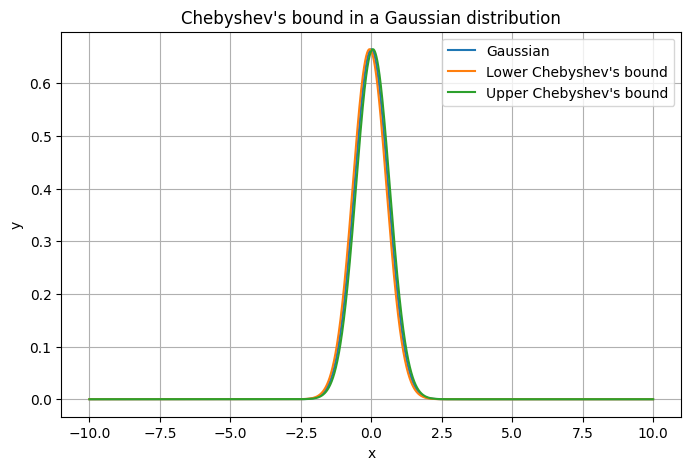

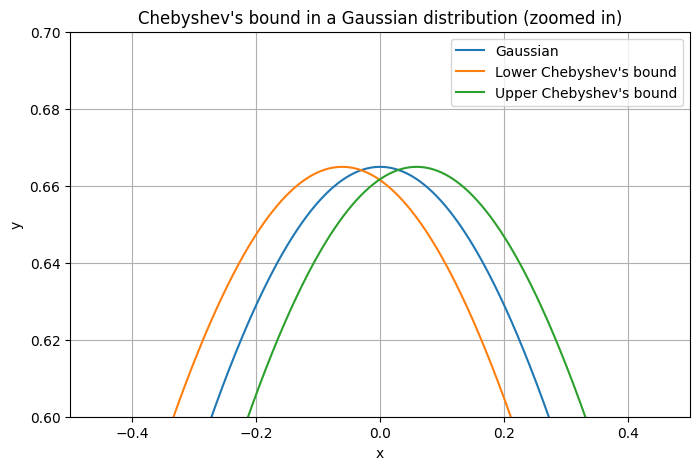

In [25]:
plot_GC(mu = 0, sigma = 0.6, RciN=RciN, LciN=LciN)
plot_GC_zoom(mu = 0, sigma = 0.6, RciN=RciN, LciN=LciN)

If we lower the confidence level (make $\gamma$ bigger), we see that our confidence interval shrinks: it's easier to be sure that our data follows our given distribution if the requirements are less strict.

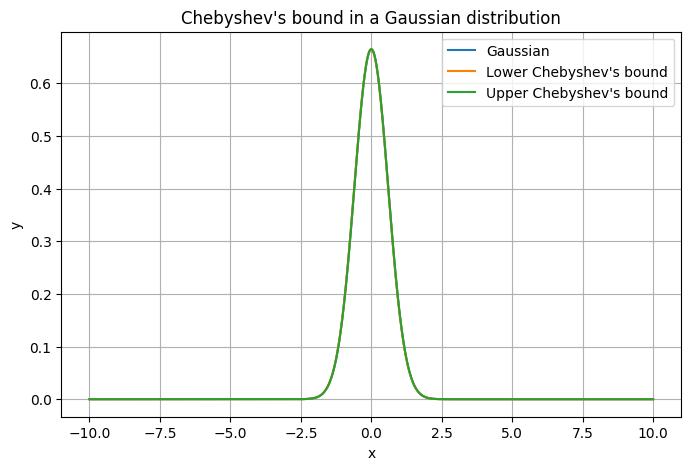

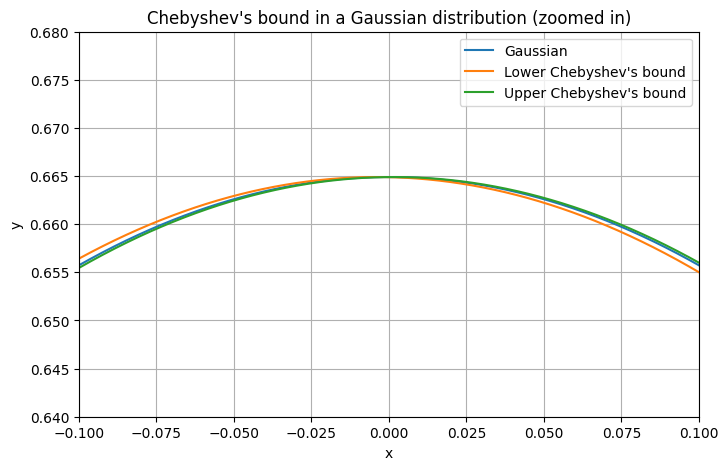

In [26]:
LciN, RciN, LciU, RciU, LciB, RciB = confidence(gamma=0.05)
plot_GC(mu = 0, sigma = 0.6, RciN=RciN, LciN=LciN)
plot_GC_zoom(-0.1,0.1,0.64,0.68, mu = 0, sigma = 0.6, RciN=RciN, LciN=LciN)

If we instead lower the number of samples, for a given confidence level we'll see how the bounds are further from the desired distribution than with a greater number of samples

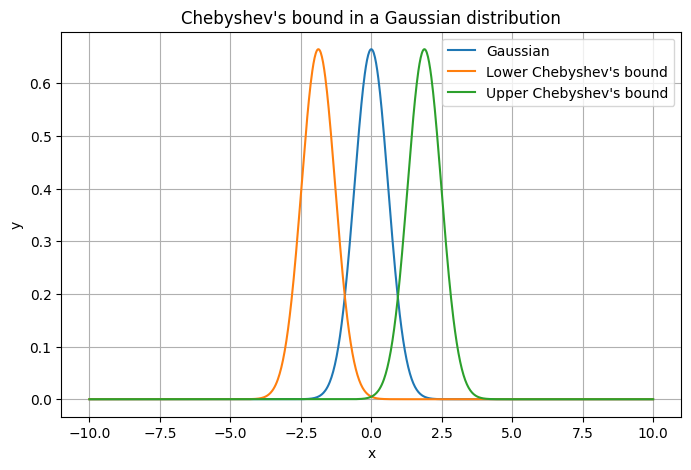

In [27]:
x_normal, x_uniform, x_beta, x, mN, sN, mU, sU, mB, sB = data_set(N = 1000, mu = 0, sigma = 0.6, a = -1, b = 2, alpha = 3, beta = 10)
LciN, RciN, LciU, RciU, LciB, RciB = confidence(gamma=0.0001)
plot_GC(mu = 0, sigma = 0.6, RciN=RciN, LciN=LciN)

For the other two distributions we get similar results, but we can't plot it as we did it with the Gaussian distribution because the parameters that define them are not the mean and the standard deviation. Then, in this case, we will present the upper and lower bounds given a certain confidence interval and/or number of elements in our set. Starting once again with a confidence interval of 99.99%

In [ ]:
# REVISAR! AÇÒ MALAMENT
N_ci = [0,1,2,3]
gamma = [0.01,0.02,0.03,0.05]

for i in range(0,np.size(N_ci)):
    LciN[i], RciN[i], LciU[i], RciU[i], LciB[i], RciB[i] = confidence(gamma=gamma[i])

dataU = {
    "Confidence level": N_ci,
    "Lower bound": LciU,
    "Upper bound": RciU
}

df = pd.DataFrame(dataU)

print(df)

ValueError: All arrays must be of the same length

BLABLABLA ignora baix BAIX

Following Chebyshev's inequality, we know that the probability of our data to be outside the confidence interval $(\mu-k\sigma,\mu+k\sigma)$ does not exceed $1/k^2$. This is general for any probability distribution, but the mean and standard deviation will be specific of each set of data (which is generated by a given set of parameters and a probability distribution). Let's now choose some specific values for $k$.

For every set of data we can say that:
- $k=1.1$. The probability of the probability of our data to be outside the confidence interval $(\mu-2\sigma,\mu+2\sigma)$ does not exceed $1/1.21\rightarrow~\sim83\%$
- $k=2$. The probability of the probability of our data to be outside the confidence interval $(\mu-2\sigma,\mu+2\sigma)$ does not exceed $1/4\rightarrow 25\%$
- $k=5$. The probability of the probability of our data to be outside the confidence interval $(\mu-5\sigma,\mu+5\sigma)$ does not exceed $1/25 \rightarrow 4\%$
- $k=9$. The probability of the probability of our data to be outside the confidence interval $(\mu-9\sigma,\mu+9\sigma)$ does not exceed $1/81\rightarrow~\sim1\%$

Let's see how that translates into our data:

In [58]:
k = np.array([1.1,2,5,9])

ciNp = mN - k*sN
ciNm = mN + k*sN

ciUp = mU - k*sU
ciUm = mU + k*sU

ciBp = mB - k*sB
ciBm = mB + k*sB

ciN = np.column_stack((ciNp,ciNm))
ciU = np.column_stack((ciUp,ciUm))
ciB = np.column_stack((ciBp,ciBm))

In [59]:
print(ciN)

[[-0.65880212  0.66002664]
 [-1.19832298  1.1995475 ]
 [-2.99672584  2.99795037]
 [-5.39459633  5.39582085]]


In [60]:
print(ciN[2,1])

2.997950366443778


In [61]:
def plot_GH(mu=0, sigma=1, k=[2,3,4,5]):
    k = np.array([1.1,2,5,9])

    ciNp = mN - k*sN # Gaussian
    ciNm = mN + k*sN
    ciUp = mU - k*sU # Uniform
    ciUm = mU + k*sU
    ciBp = mB - k*sB # Beta
    ciBm = mB + k*sB

    ciN = np.column_stack((ciNp,ciNm))
    ciU = np.column_stack((ciUp,ciUm))
    ciB = np.column_stack((ciBp,ciBm))
    
    x = np.linspace(-10, 10, 1000) # Generate a vector from -10 to 10 with 1000 points and save it in the "x" variable
    x_pdf = (1 / np.sqrt(2 * np.pi * sigma ** 2)) * np.exp(- (x - mu) ** 2 / (2 * sigma ** 2)) # We define our Probability Density Function (PDF) and we compute its value in each of our x points. Check https://en.wikipedia.org/wiki/Normal_distribution or any statistics book for the equations being used
    cnf = sp.stats.norm.interval(confidence, loc=mu, scale=sigma)

    fig = plt.figure(figsize=(8,5)) # Generate an empty plot with the dimensions specified: (width, height) in inches
    ax = fig.add_subplot(1,1,1) # We generate the axes for our plot (nrows, ncols, index)
    ax.plot(x, x_pdf, label='PDF') # Plot the PDF and assign it a label
    ax.fill_between(x, (x_pdf-np.absolute(cnf[0])), (x_pdf+np.absolute(cnf[1])), color='b', alpha=0.1, label='Confidence interval')

    ax.grid() # Plot a grid
    ax.legend() # Plot a legend
    ax.set_xlabel('x') # Add the x axis label
    ax.set_ylabel('y') # Add the y axis label
    ax.set_title('PDF and CDF of Gaussian Distribution') # Set a title for the whole plot

IGNORA A PARTIR D'ACÍ!

In [62]:
def plot_gaussian_pdf(mu=0, sigma=1, confidence=0.9):
    x = np.linspace(-10, 10, 1000) # Generate a vector from -10 to 10 with 1000 points and save it in the "x" variable
    x_pdf = (1 / np.sqrt(2 * np.pi * sigma ** 2)) * np.exp(- (x - mu) ** 2 / (2 * sigma ** 2)) # We define our Probability Density Function (PDF) and we compute its value in each of our x points. Check https://en.wikipedia.org/wiki/Normal_distribution or any statistics book for the equations being used
    cnf = sp.stats.norm.interval(confidence, loc=mu, scale=sigma)

    fig = plt.figure(figsize=(8,5)) # Generate an empty plot with the dimensions specified: (width, height) in inches
    ax = fig.add_subplot(1,1,1) # We generate the axes for our plot (nrows, ncols, index)
    ax.plot(x, x_pdf, label='PDF') # Plot the PDF and assign it a label
    ax.fill_between(x, (x_pdf-np.absolute(cnf[0])), (x_pdf+np.absolute(cnf[1])), color='b', alpha=0.1, label='Confidence interval')

    ax.grid() # Plot a grid
    ax.legend() # Plot a legend
    ax.set_xlabel('x') # Add the x axis label
    ax.set_ylabel('y') # Add the y axis label
    ax.set_title('PDF and CDF of Gaussian Distribution') # Set a title for the whole plot

Then, we can plot any Gaussian PDF and CDF that we desire by choosing some specific values for the mean and the standard deviation:

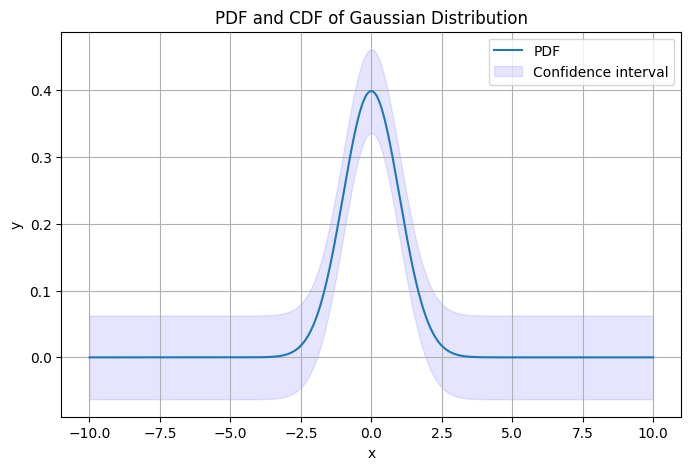

In [63]:
# mean = 0, std = 1

plot_gaussian_pdf(mu=0, sigma=1,confidence=0.05)

Smaller values of the std make our distribution narrower (bigger values would make it wider):

In [64]:
# mean = 0, std = 0.6

plot_gaussian_pdf_cdf(mu=0, sigma=0.6)

NameError: name 'plot_gaussian_pdf_cdf' is not defined

Smaller values of the mean shift our distribution to the left (bigger ones would shift it to the right):

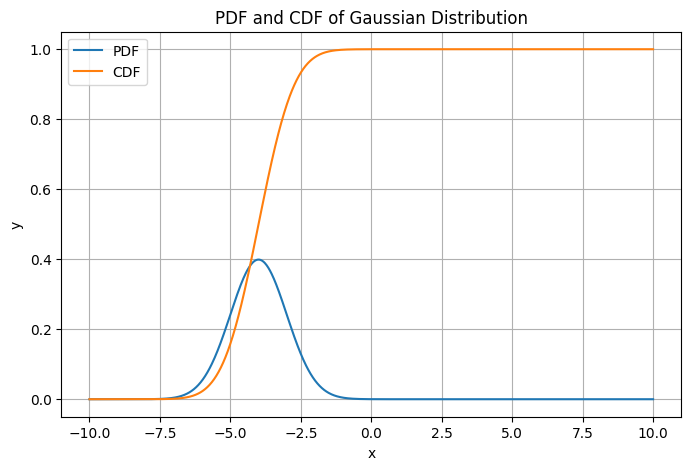

In [ ]:
# mean = -4, std = 1
# Smaller of 

plot_gaussian_pdf_cdf(mu=-4, sigma=1)

### Uniformly random distribution

$$\begin{align*}
f(x) &= 
\begin{cases}
\displaystyle \frac{1}{b-a}, & \text{for } a \le x \le b\\[6pt]
0, & \text{for } x<a \text{ or } x>b
\end{cases}
\end{align*}$$

Let's now try a uniformly random distribution (also called rectangular distribution). We'll start by defining a similar function as in the previous case:

In [158]:
# Default values: a = 0, b = 1.

def plot_uniform_pdf_cdf(a=0, b=1):
    x = np.linspace(-10, 10, 1000) # Generate a vector from -10 to 10 with 1000 points and save it in the "x" variable
    x_pdf = sp.stats.uniform.pdf(x, loc=a, scale=b-a) # Uniform PDF
    x_cdf = sp.stats.uniform.cdf(x, loc=a, scale=b-a) # Uniform CDF
    fig = plt.figure(figsize=(8,5)) # Generate an empty plot with the dimensions specified: (width, height) in inches
    ax = fig.add_subplot(1,1,1) # We generate the axes for our plot (nrows, ncols, index)
    ax.plot(x, x_pdf, label='PDF') # Plot the PDF and assign it a label
    ax.plot(x, x_cdf, label='CDF') # Plot the CDF and assign it a label
    ax.grid() # Plot a grid
    ax.legend() # Plot a legend
    ax.set_xlabel('x') # Add the x axis label
    ax.set_ylabel('y') # Add the y axis label
    ax.set_title('PDF and CDF of Uniform Distribution') # Set a title for the whole plot

Then, we can plot any uniform PDF and CDF that we desire by choosing some specific values for $a$ and $b$:

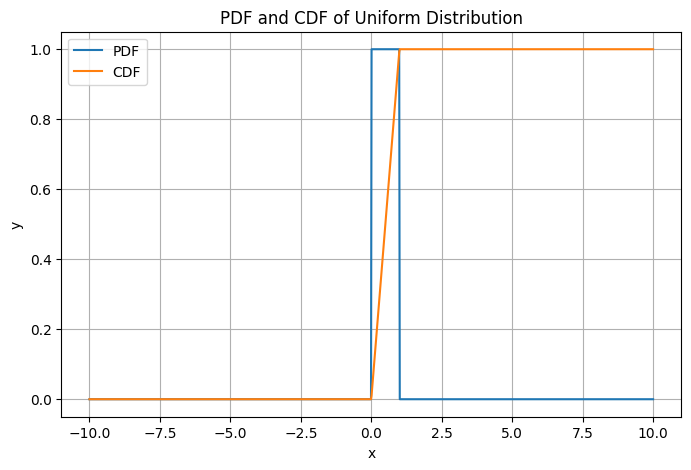

In [159]:
# a = 0, b = 1

plot_uniform_pdf_cdf(a=0, b=1)

Bigger values of the difference between $b$ and $a$ make our distribution wider and smaller (smaller values would make it narrower and taller):

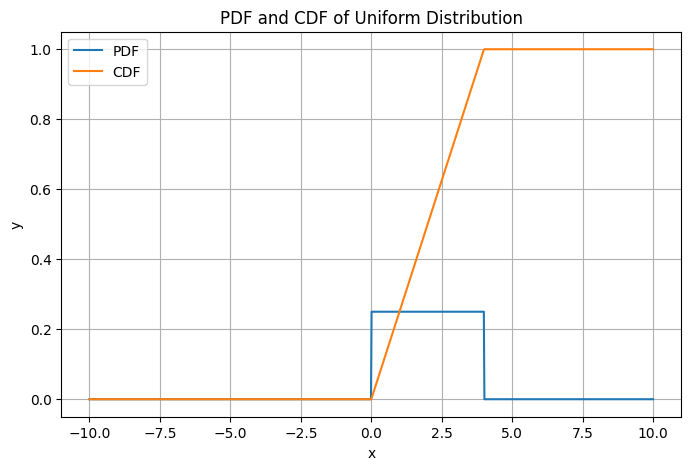

In [160]:
# a = -2, b = 4

plot_uniform_pdf_cdf(a=0, b=4)

### Beta distribution

$$f(x,\alpha,\beta)=\frac{\Gamma(\alpha+\beta)x^{\alpha-1}(1-x)^{\beta-1}}{\Gamma(\alpha)\Gamma(\beta)}$$

Let's now try a beta distribution. We'll start by defining a similar function as in the other cases:

In [ ]:
# Default values: a = 0, b = 1. Notice that a,b > 0.

def plot_beta_pdf_cdf(a=1, b=1):
    x = np.linspace(-1, 1, 1000) # Generate a vector from -1 to 1 with 1000 points and save it in the "x" variable
    x_pdf = sp.stats.beta.pdf(x, a, b) # Beta PDF
    x_cdf = sp.stats.beta.cdf(x, a, b) # Beta CDF
    fig = plt.figure(figsize=(8,5)) # Generate an empty plot with the dimensions specified: (width, height) in inches
    ax = fig.add_subplot(1,1,1) # We generate the axes for our plot (nrows, ncols, index)
    ax.plot(x, x_pdf, label='PDF') # Plot the PDF and assign it a label
    ax.plot(x, x_cdf, label='CDF') # Plot the CDF and assign it a label
    ax.grid() # Plot a grid
    ax.legend() # Plot a legend
    ax.set_xlabel('x') # Add the x axis label
    ax.set_ylabel('y') # Add the y axis label
    ax.set_title('PDF and CDF of Beta Distribution') # Set a title for the whole plot

Then, we can plot any Beta PDF and CDF that we desire by choosing some specific values for $\alpha$ and $\beta$:

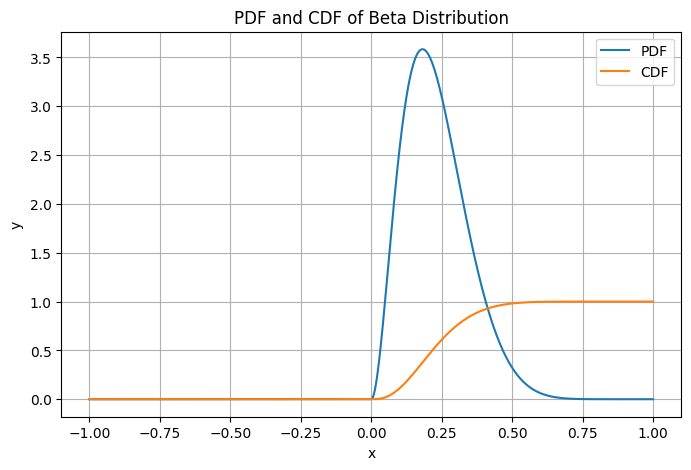

In [ ]:
# alpha = 3, beta = 10

plot_beta_pdf_cdf(a=3, b=10)

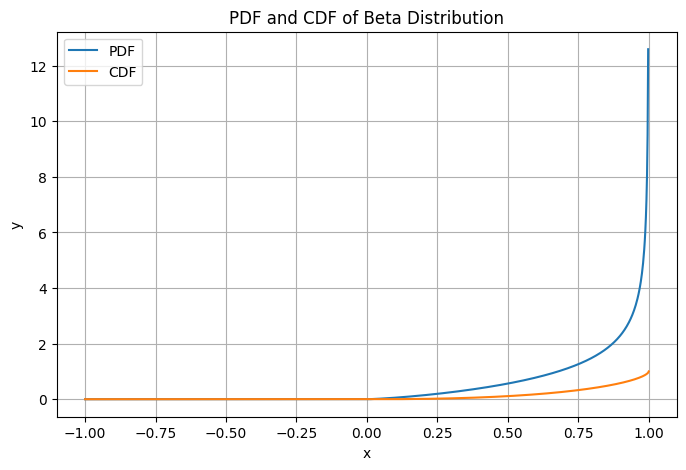

In [ ]:
# alpha = 2.3, beta = 0.6

plot_beta_pdf_cdf(a=2.3, b=0.6)

### Generating random data

Finally, let's generate random data from the different distributions discussed previously and compare them. First, we'll generate the random data:

In [123]:
y_normal = np.random.normal(0,0.6,1000)
y_uniform = np.random.uniform(-1,2,1000)
y_beta = np.random.beta(3,10,1000)
x = np.linspace(-10,10,1000)

With this, we can plot it to see the differences between the different sets of data:

Text(0.5, 1.0, 'PDF and CDF of Gaussian Distribution')

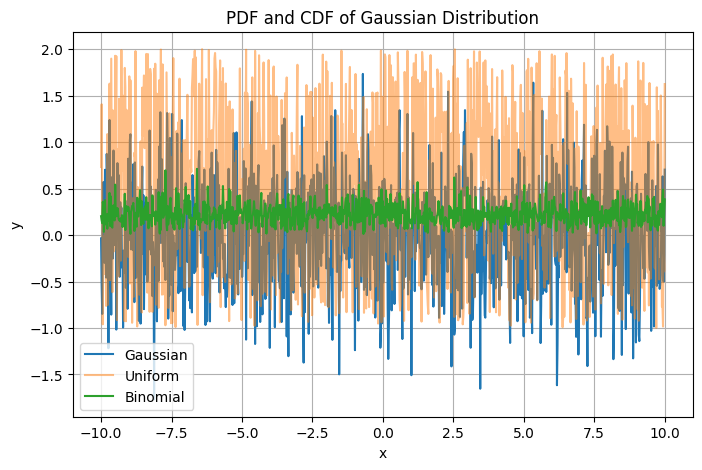

In [124]:
fig = plt.figure(figsize=(8,5)) # Generate an empty plot with the dimensions specified: (width, height) in inches
ax = fig.add_subplot(1,1,1) # We generate the axes for our plot (nrows, ncols, index)
ax.plot(x, y_normal, label='Gaussian') # Plot the PDF and assign it a label
ax.plot(x, y_uniform, label='Uniform', alpha=0.5)
ax.plot(x, y_beta, label='Binomial')
ax.grid() # Plot a grid
ax.legend() # Plot a legend
ax.set_xlabel('x') # Add the x axis label
ax.set_ylabel('y') # Add the y axis label
ax.set_title('PDF and CDF of Gaussian Distribution') # Set a title for the whole plot

and also plot the data as a histogram to clearly see the general form discussed above that the different data sets should follow

Text(0.5, 1.0, 'Comparision of randomly generated data')

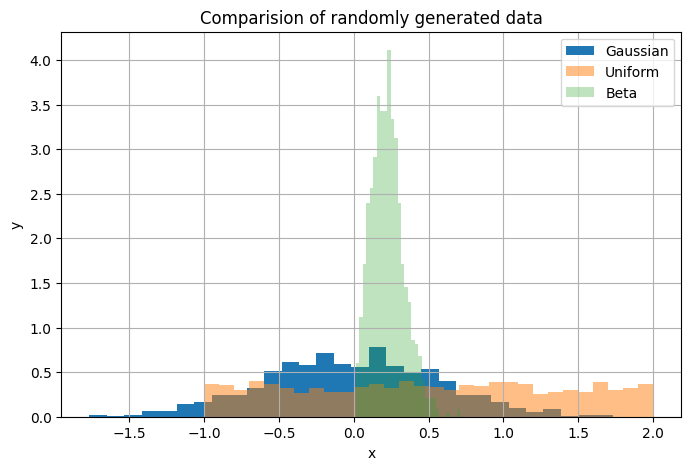

In [132]:
fig = plt.figure(figsize=(8,5)) # Generate an empty plot with the dimensions specified: (width, height) in inches
ax = fig.add_subplot(1,1,1) # We generate the axes for our plot (nrows, ncols, index)

countN, binsN, ignoredN = plt.hist(y_normal, 30, density=True, label='Gaussian')
countU, binsU, ignoredU = plt.hist(y_uniform, 30, density=True, alpha=0.5, label='Uniform')
countB, binsB, ignoredB = plt.hist(y_beta, 30, density=True, alpha=0.3, label='Beta')

ax.grid() # Plot a grid
ax.legend() # Plot a legend
ax.set_xlabel('x') # Add the x axis label
ax.set_ylabel('y') # Add the y axis label
ax.set_title('Comparision of randomly generated data') # Set a title for the whole plot

Finally, we can plot those histograms with its distributions superposed, to check whether the data follows it's designated distribution or not:

In [156]:
def plot_data_dist_comp(y_normal, y_uniform, y_beta, mu=0, sigma=1, a=0, b=1, c=2, d=4):
    fig, ax = plt.subplots(figsize=(8,5))

    ax.hist(y_normal, bins=30, density=True, alpha=0.6, label='Gaussian')
    ax.hist(y_uniform, bins=30, density=True, alpha=0.5, label='Uniform')
    ax.hist(y_beta, bins=30, density=True, alpha=0.4, label='Beta')

    xmin = min(np.min(y_normal), np.min(y_uniform), np.min(y_beta))
    xmax = max(np.max(y_normal), np.max(y_uniform), np.max(y_beta))
    x = np.linspace(xmin, xmax, 1000)

    x_pdf_G = sp.stats.norm.pdf(x, loc=mu, scale=sigma)
    x_pdf_U = sp.stats.uniform.pdf(x, loc=a, scale=b-a)
    x_pdf_B = sp.stats.beta.pdf(x, c, d)

    ax.plot(x, x_pdf_G, color='C0', lw=2, label='Gauss PDF')
    ax.plot(x, x_pdf_U, color='C1', lw=2, label='Uniform PDF')
    ax.plot(x, x_pdf_B, color='C2', lw=2, label='Beta PDF')

    ax.grid(True)
    ax.legend()
    ax.set_xlabel('x')
    ax.set_ylabel('Density')
    ax.set_title("Random data with its originating distributions")
    plt.show()


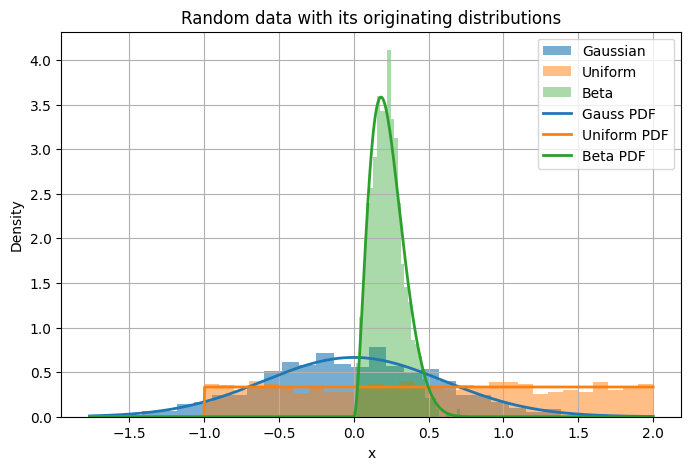

In [157]:
plot_data_dist_comp(y_normal, y_uniform, y_beta, mu=0, sigma=0.6, a=-1, b=2, c=3, d=10)